In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os
import math
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 28s 0us/step


In [7]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
val_cats_dir = os.path.join(test_dir, 'cats')
val_dogs_dir = os.path.join(test_dir, 'dogs')

In [9]:
total_train = len(os.listdir(train_cats_dir))+len(os.listdir(train_dogs_dir))
total_val = len(os.listdir(val_cats_dir))+len(os.listdir(val_dogs_dir))

Setting Model Parameters

In [11]:
BATCH_SIZE = 100
IMG_SHAPE = 150

Data Augmentation

Overfitting often occurs when we have a small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number and variety of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples through random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This exposes the model to more aspects of the data, allowing it to generalize better.

In tf.keras we can implement this using the same ImageDataGenerator class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

To start off, let's define a function that can display an image, so we can see the type of augmentation that has been performed. Then, we'll look at specific augmentations that we'll use during training.

In [17]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Flipping the image horizaontally

We can begin by randomly applying horizontal flip augmentation to our dataset and seeing how individual images will look after the transformation. This is achieved by passing horizontal_flip=True as an argument to the ImageDataGenerator class.

In [15]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen=image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                            directory=train_dir,
                                            shuffle=True,
                                            target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


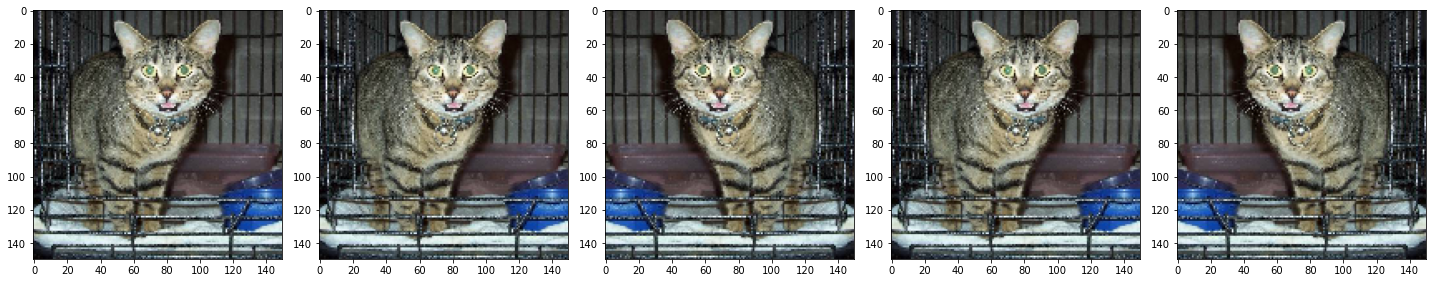

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Rotating Images

In [20]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


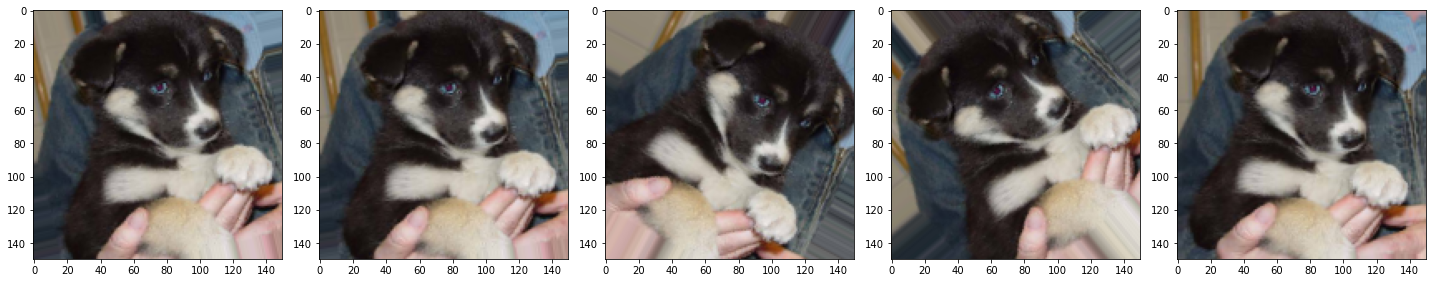

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Applying zoom

In [23]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


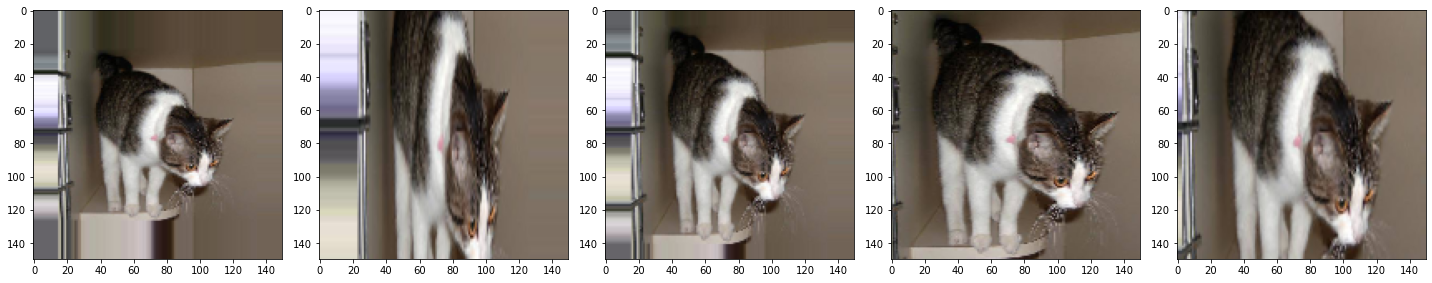

In [24]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Combining all the image augmentation methods

In [28]:
image_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


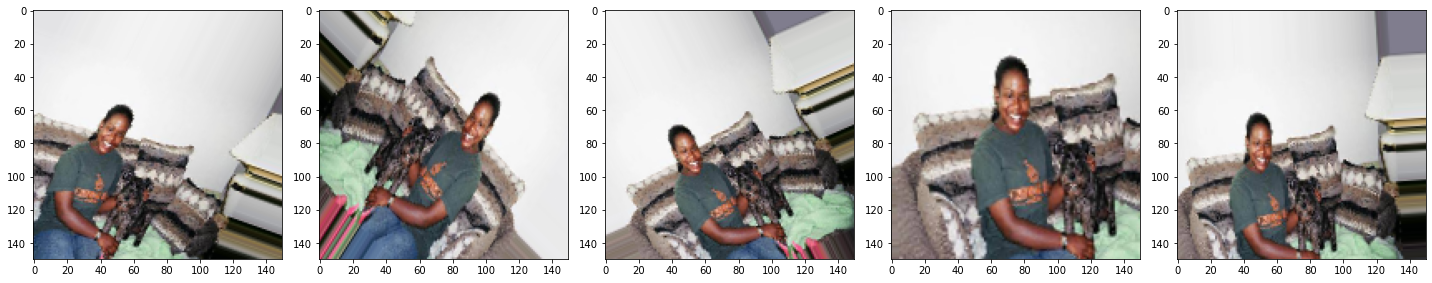

In [29]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Validation Data

In [31]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory=test_dir,
                                                target_size=(IMG_SHAPE, IMG_SHAPE),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


Model creation

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(2),

])

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Training the model

Since our batches are coming from a generator (ImageDataGenerator), we'll use fit_generator instead of fit.

In [40]:
epochs = 100
history = model.fit_generator(
    train_data_gen,
    s = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))))

C:\Users\Akhil\AppData\Local\Temp/ipykernel_22184/3485984412.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 28s 881ms/step - loss: 0.7013 - accuracy: 0.4945 - val_loss: 0.6902 - val_accuracy: 0.5200
Epoch 2/100
20/20 [==============================] - 16s 784ms/step - loss: 0.6915 - accuracy: 0.5095 - val_loss: 0.6815 - val_accuracy: 0.5100
Epoch 3/100
20/20 [==============================] - 16s 782ms/step - loss: 0.6831 - accuracy: 0.5600 - val_loss: 0.6643 - val_accuracy: 0.6250
Epoch 4/100
20/20 [==============================] - 16s 790ms/step - loss: 0.6867 - accuracy: 0.5375 - val_loss: 0.6737 - val_accuracy: 0.6340
Epoch 5/100
20/20 [==============================] - 16s 784ms/step - loss: 0.6739 - accuracy: 0.5705 - val_loss: 0.6454 - val_accuracy: 0.6130
Epoch 6/100
20/20 [==============================] - 16s 784ms/step - loss: 0.6644 - accuracy: 0.6100 - val_loss: 0.6415 - val_accuracy: 0.6470
Epoch 7/100
20/20 [==============================] - 16s 784ms/step - loss: 0.6412 - accuracy: 0.6305 - val_loss: 0.6125 - val_accuracy:

20/20 [==============================] - 15s 760ms/step - loss: 0.3987 - accuracy: 0.8150 - val_loss: 0.4219 - val_accuracy: 0.8010
Epoch 58/100
20/20 [==============================] - 16s 822ms/step - loss: 0.4500 - accuracy: 0.7790 - val_loss: 0.4343 - val_accuracy: 0.8090
Epoch 59/100
20/20 [==============================] - 15s 767ms/step - loss: 0.3999 - accuracy: 0.8200 - val_loss: 0.4543 - val_accuracy: 0.7800
Epoch 60/100
20/20 [==============================] - 15s 763ms/step - loss: 0.4005 - accuracy: 0.8180 - val_loss: 0.4467 - val_accuracy: 0.7940
Epoch 61/100
20/20 [==============================] - 15s 767ms/step - loss: 0.3948 - accuracy: 0.8110 - val_loss: 0.4523 - val_accuracy: 0.8020
Epoch 62/100
20/20 [==============================] - 15s 762ms/step - loss: 0.4090 - accuracy: 0.8175 - val_loss: 0.4325 - val_accuracy: 0.8000
Epoch 63/100
20/20 [==============================] - 15s 769ms/step - loss: 0.3838 - accuracy: 0.8275 - val_loss: 0.4480 - val_accuracy: 0.782

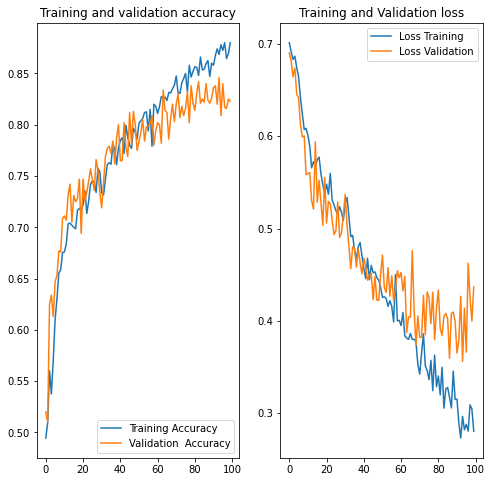

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=  history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation  Accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation accuracy")

plt.subplot(1,2,2 )
plt.plot(epochs_range, loss, label = 'Loss Training')
plt.plot(epochs_range, val_loss, label='Loss Validation')
plt.legend(loc="upper right")
plt.title("Training and Validation loss")
plt.show()